In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/u-s-census-dataset-education-finance-industry/Educationv.csv
/kaggle/input/u-s-census-dataset-education-finance-industry/Finance.csv
/kaggle/input/u-s-census-dataset-education-finance-industry/Industry.csv


Instructions & Marking Scheme
Step 1: Select a Dataset (10 Marks)
Choose a dataset from Kaggle or any open-source platform.
Ensure the dataset has enough features and a well-defined target variable.
(5 Marks): Selecting a relevant dataset for classification or regression.
(5 Marks): Successfully loading the dataset into Python (Pandas).


In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../input/u-s-census-dataset-education-finance-industry/Industry.csv')

# Display first few rows
print(df.head())


   Year    cd  Total_Agriculture_forestry_fishing_hunting_mining  \
0  2019  0_PR                                               6239   
1  2019  1_MA                                               1612   
2  2019  2_MA                                               1294   
3  2019  3_MA                                                541   
4  2019  4_MA                                                590   

   Total_Construction  Total_Manufacturing  Total_Wholesale_trade  \
0               33555                73692                  23153   
1               16225                37577                   8364   
2               14207                32599                   6414   
3               18000                48852                   7105   
4               19548                36590                  10322   

   Total_Retail_trade  Total_Transportation_warehousing_utilities  \
0               70787                                       29104   
1               25590                 

Step 2: Data Cleaning (20 Marks)
Handle missing values (remove or impute missing data appropriately).
Check for and remove duplicates, if applicable.
Ensure proper formatting and structure for further analysis.
(10 Marks): Identifying and handling missing values correctly.
(5 Marks): Cleaning data effectively and providing justification.
(5 Marks): Ensuring the dataset is properly structured and ready for modeling.


In [9]:
# Check for missing values
print(df.isnull().sum())

# Check for duplicates
df.drop_duplicates(inplace=True)

# Convert categorical column 'cd' to string
df['cd'] = df['cd'].astype(str)

print(df.info())  # Verify data structure


Year                                                                                  0
cd                                                                                    0
Total_Agriculture_forestry_fishing_hunting_mining                                     0
Total_Construction                                                                    0
Total_Manufacturing                                                                   0
Total_Wholesale_trade                                                                 0
Total_Retail_trade                                                                    0
Total_Transportation_warehousing_utilities                                            0
Total_Information                                                                     0
Total_Finance_insurance_realestate_rental_leasing                                     0
Total_Professional_scientific_management_administrative_waste_management_services     0
Total_Educationalservices_health

Step 3: Feature Engineering & Standardization (20 Marks)
Encode categorical variables (if applicable) using Label Encoding or One-Hot Encoding.
Apply Standardization using StandardScaler or MinMaxScaler to normalize numerical features.
Handle outliers if necessary (e.g., using Z-score or IQR method).
(10 Marks): Correctly encoding categorical variables.
(5 Marks): Applying standardization properly.
(5 Marks): Handling outliers (if needed) and explaining the approach.


In [11]:
from sklearn.preprocessing import MinMaxScaler

# Selecting relevant features
features = ['Total_Construction', 'Total_Retail_trade']
target = 'Total_Manufacturing'

X = df[features]
y = df[target]

# Apply MinMax Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X = pd.DataFrame(X_scaled, columns=features)

print(X.head())  # Display scaled features


   Total_Construction  Total_Retail_trade
0            0.552801            0.951135
1            0.256480            0.334566
2            0.221975            0.271295
3            0.286831            0.287460
4            0.313299            0.363254


Step 4: Exploratory Data Analysis (EDA) & Visualization (15 Marks)
Visualize important features using graphs (e.g., histograms, scatter plots, bar charts).
Generate a correlation heatmap (if applicable).
Extract and explain 3-5 key insights from the dataset.
(8 Marks): Clear and meaningful visualizations.
(7 Marks): Well-explained insights based on the visualizations

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


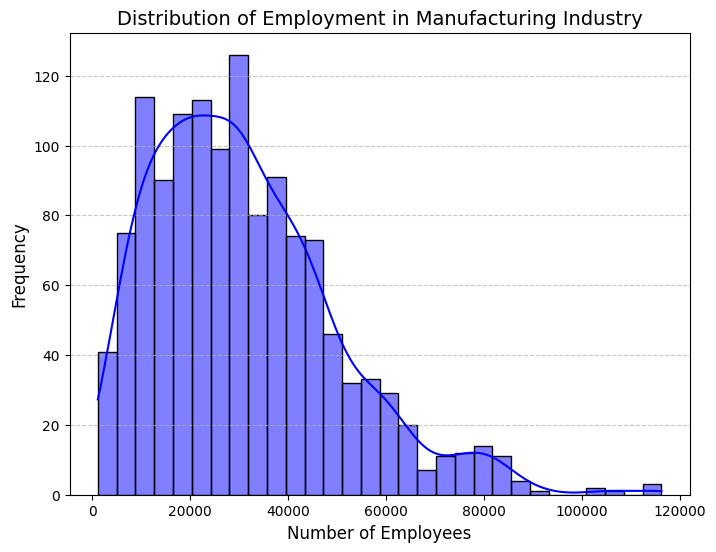

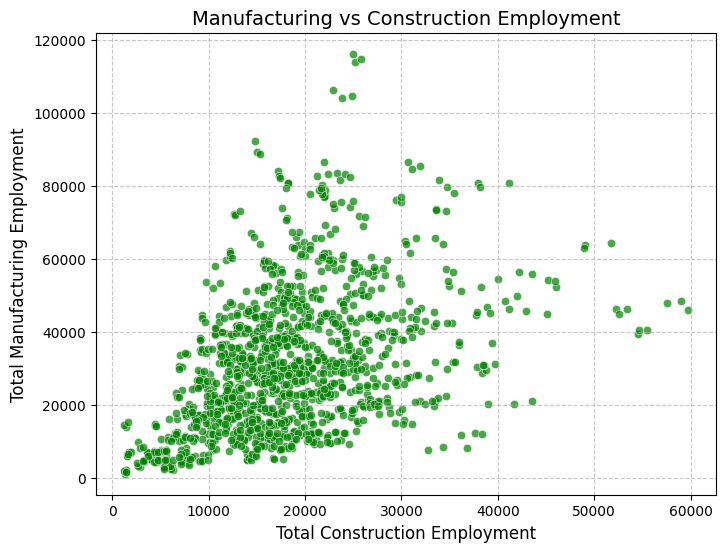

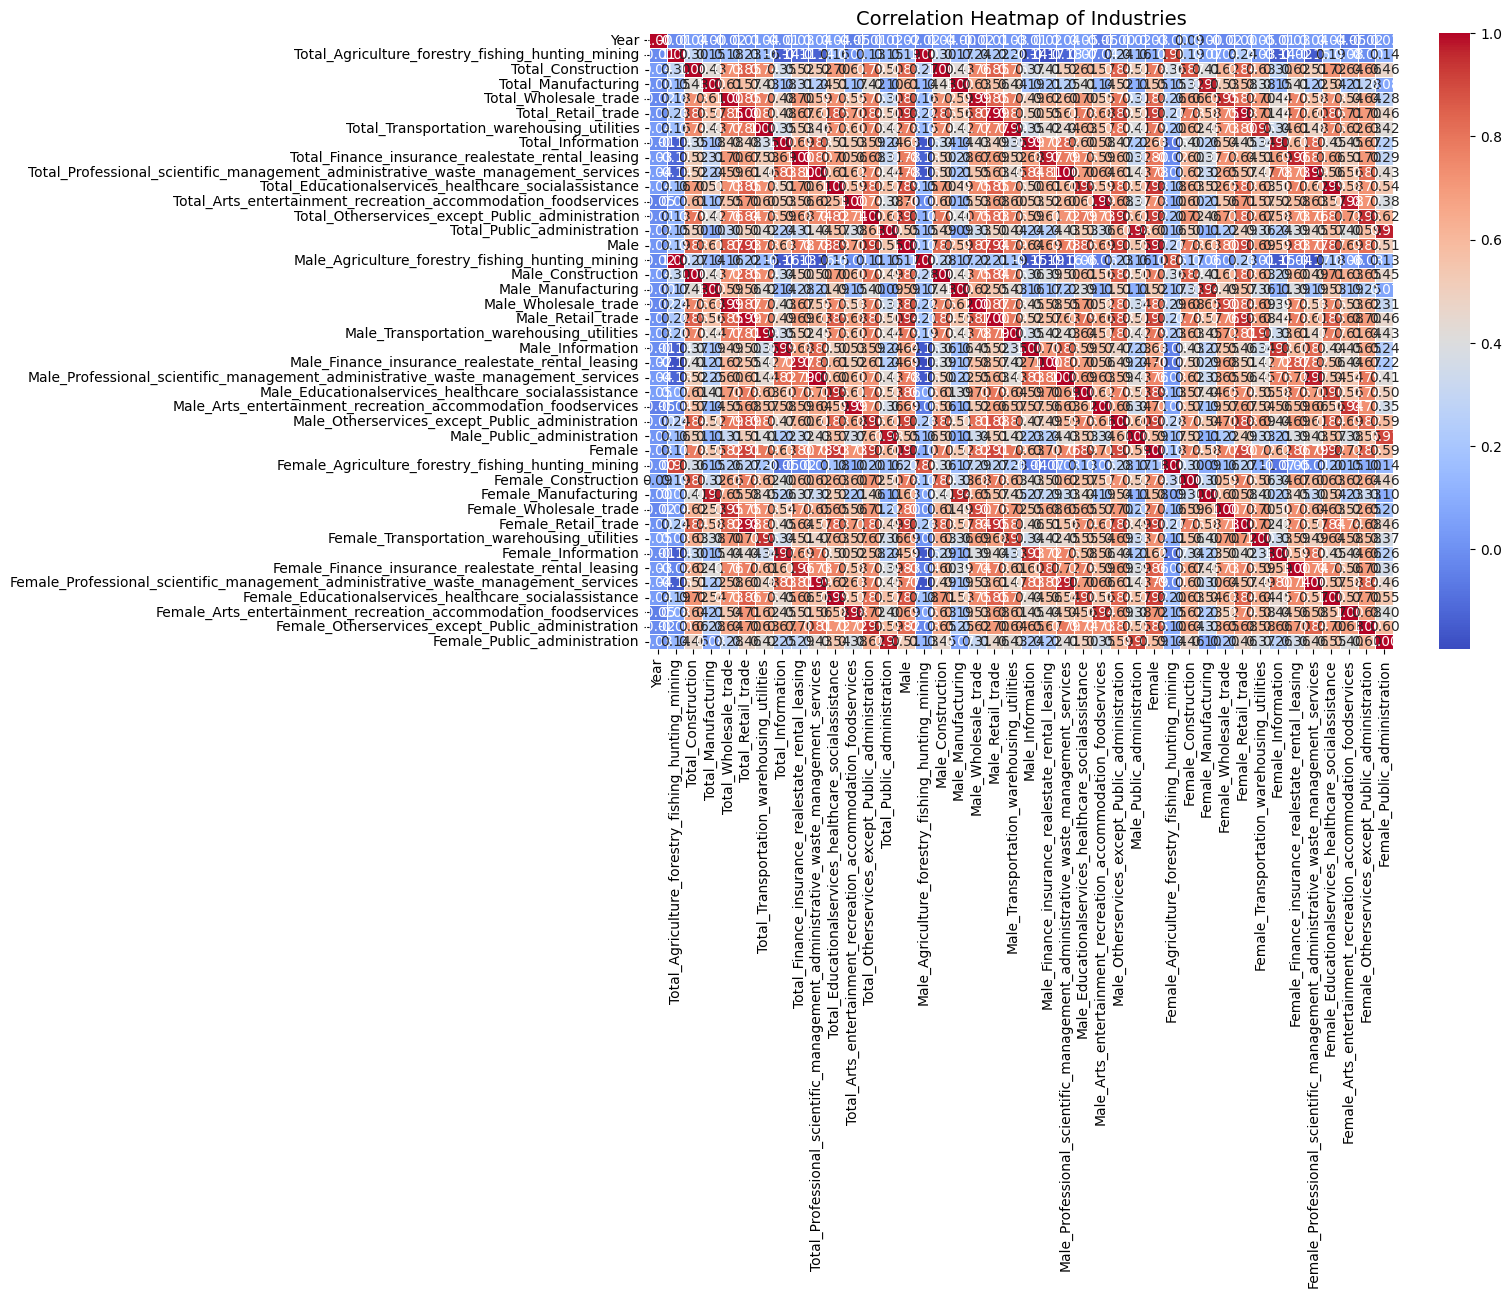

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure numerical columns are used
df_numeric = df.select_dtypes(include=['number'])

# Distribution of Total Manufacturing Employment
plt.figure(figsize=(8, 6))
sns.histplot(df_numeric['Total_Manufacturing'].dropna(), kde=True, bins=30, color='blue')
plt.title('Distribution of Employment in Manufacturing Industry', fontsize=14)
plt.xlabel('Number of Employees', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Scatter Plot: Construction vs Manufacturing Employment
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_numeric['Total_Construction'], y=df_numeric['Total_Manufacturing'], color='green', alpha=0.7)
plt.title('Manufacturing vs Construction Employment', fontsize=14)
plt.xlabel('Total Construction Employment', fontsize=12)
plt.ylabel('Total Manufacturing Employment', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of Industries', fontsize=14)
plt.show()


Step 5: Apply a Machine Learning Model (30 Marks)
Choose and apply either a Regression or Classification model:
If the target variable is numerical → Linear Regression.
If the target variable is categorical → Logistic Regression or another classification model.
Train the model using Scikit-learn.
Use a train-test split (e.g., 80-20 or 70-30).
Evaluate the model using proper metrics:
Regression → RMSE, R² Score.
Classification → Accuracy, Precision, Recall, F1-Score.
(10 Marks): Correct model selection based on dataset type.
(10 Marks): Implementing and training the model properly with train-test split.
(10 Marks): Evaluating model using appropriate performance metrics.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = mse_lr ** 0.5
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr:.2f}")
print(f"Linear Regression R2 Score: {r2_lr:.2f}")





Linear Regression RMSE: 16182.72
Linear Regression R2 Score: 0.31


Step 6: Conclusion & Future Improvements (10 Marks)
Summarize findings and discuss model performance.
Suggest at least two possible improvements (e.g., using more data, trying a different model, feature selection, hyperparameter tuning).
(5 Marks): Well-explained summary of findings.
(5 Marks): Thoughtful suggestions for improvement.


In [16]:
# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R2 Score: {r2_rf:.2f}")


Random Forest RMSE: 15762.47
Random Forest R2 Score: 0.35
